# Data Analysis

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df1 = pd.read_csv("C:\\Users\\visha\\Desktop\\Final Project\\twitter_new.csv", encoding='ISO-8859-1')
df1.head(2)

,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer. You shoulda got David Carr of Third Day to do it. ;D"
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...


In [3]:
df1.tail(2)

,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer. You shoulda got David Carr of Third Day to do it. ;D"
1599997,4,2193602064,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,tinydiamondz,Happy 38th Birthday to my boo of alll time!!! ...
1599998,4,2193602129,Tue Jun 16 08:40:50 PDT 2009,NO_QUERY,RyanTrevMorris,happy #charitytuesday @theNSPCC @SparksCharity...


In [4]:
df1.columns = ['target', 'tweet_id', 'date', 'flag', 'user_name', 'text']

In [5]:
df1.head()

,target,tweet_id,date,flag,user_name,text
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew


In [6]:
df1.shape

(1599999, 6)

In [7]:
df1.isnull().sum()

target       0
tweet_id     0
date         0
flag         0
user_name    0
text         0
dtype: int64

In [8]:
df1.columns

Index(['target', 'tweet_id', 'date', 'flag', 'user_name', 'text'], dtype='object')

In [9]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599999 entries, 0 to 1599998
Data columns (total 6 columns):
 #   Column     Non-Null Count    Dtype 
---  ------     --------------    ----- 
 0   target     1599999 non-null  int64 
 1   tweet_id   1599999 non-null  int64 
 2   date       1599999 non-null  object
 3   flag       1599999 non-null  object
 4   user_name  1599999 non-null  object
 5   text       1599999 non-null  object
dtypes: int64(2), object(4)
memory usage: 73.2+ MB


In [10]:
df1.describe()

,target,tweet_id
count,1.599999e+06,1.599999e+06
mean,2.000001e+00,1.998818e+09
std,2.000001e+00,1.935757e+08
min,0.000000e+00,1.467811e+09
25%,0.000000e+00,1.956916e+09
50%,4.000000e+00,2.002102e+09
75%,4.000000e+00,2.177059e+09
max,4.000000e+00,2.329206e+09


### Retain required Columns

In [11]:
df = df1[['target', 'text']]

In [12]:
df.head()

,target,text
0,0,is upset that he can't update his Facebook by ...
1,0,@Kenichan I dived many times for the ball. Man...
2,0,my whole body feels itchy and like its on fire
3,0,"@nationwideclass no, it's not behaving at all...."
4,0,@Kwesidei not the whole crew


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599999 entries, 0 to 1599998
Data columns (total 2 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   target  1599999 non-null  int64 
 1   text    1599999 non-null  object
dtypes: int64(1), object(1)
memory usage: 24.4+ MB


In [14]:
df.isnull().sum()

target    0
text      0
dtype: int64

### Remove special characters

In [15]:
import re

def special_characters(text):
    # Convert text to lowercase
    text = text.lower()
    
    # Remove special characters and punctuation
    text = re.sub(r'[^\w\s]', '', text)
    
    # Remove numbers
    text = re.sub(r'\d+', '', text)
    
    # Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text)
    
    # Remove extra whitespaces
    text = ' '.join(text.split())

    return text

df = df.copy()

df['text'] = df['text'].apply(special_characters)


In [16]:
df.head(3)

,target,text
0,0,is upset that he cant update his facebook by t...
1,0,kenichan i dived many times for the ball manag...
2,0,my whole body feels itchy and like its on fire


### Tokenization

In [17]:
import nltk
from nltk.corpus import stopwords
# from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer

In [18]:
# nltk.download('punkt')

In [19]:
def tokenize_text(text):
    tokens = nltk.word_tokenize(text)
    return tokens

df['text'] = df['text'].apply(tokenize_text)

In [20]:
df.head(3)

,target,text
0,0,"[is, upset, that, he, cant, update, his, faceb..."
1,0,"[kenichan, i, dived, many, times, for, the, ba..."
2,0,"[my, whole, body, feels, itchy, and, like, its..."


### Stopword removal

In [21]:
def remove_stopwords(tokens):
    stop_words = set(stopwords.words("english"))
    filtered_tokens = [word for word in tokens if word not in stop_words]
    return filtered_tokens

df['text'] = df['text'].apply(remove_stopwords)


In [22]:
df['text'].head()

0    [upset, cant, update, facebook, texting, might...
1    [kenichan, dived, many, times, ball, managed, ...
2              [whole, body, feels, itchy, like, fire]
3      [nationwideclass, behaving, im, mad, cant, see]
4                              [kwesidei, whole, crew]
Name: text, dtype: object

### Lemmatization

In [23]:
# nltk.download('wordnet')

In [24]:
def lemmatize_text(tokens):
    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens = [lemmatizer.lemmatize(word) for word in tokens]
    return lemmatized_tokens

df['text'] = df['text'].apply(lemmatize_text)

In [25]:
df['text'].head()

0    [upset, cant, update, facebook, texting, might...
1    [kenichan, dived, many, time, ball, managed, s...
2               [whole, body, feel, itchy, like, fire]
3      [nationwideclass, behaving, im, mad, cant, see]
4                              [kwesidei, whole, crew]
Name: text, dtype: object

### Analyzing Distribution

In [26]:
sentiment = df['target'].value_counts()
sentiment

4    800000
0    799999
Name: target, dtype: int64

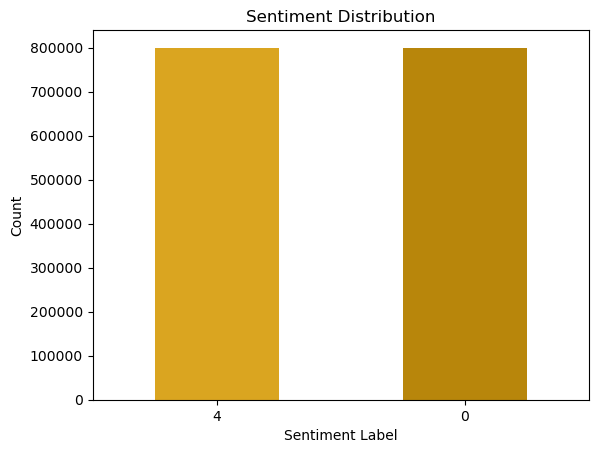

In [27]:
sentiment.plot(kind='bar', color=['goldenrod', 'darkgoldenrod'])
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment Label')
plt.ylabel('Count')
plt.xticks(rotation=360)
plt.show()

### Data Visulization

In [28]:
# !pip install wordcloud

In [29]:
from wordcloud import WordCloud

##### Negative Sentiment

In [31]:
# Filter the data by the 'target' column to select sentiment label 0 (negative)

negative_df = df[df['target'] == 0]

# Get the corresponding text data for sentiment label 0

negative_text = ' '.join(negative_df['text'].astype(str))  # Ensure text is treated as strings

# Create a word cloud for negative sentiment (0 - negative)

wordcloud_negative = WordCloud(width=800, height=400, background_color='white').generate(negative_text)

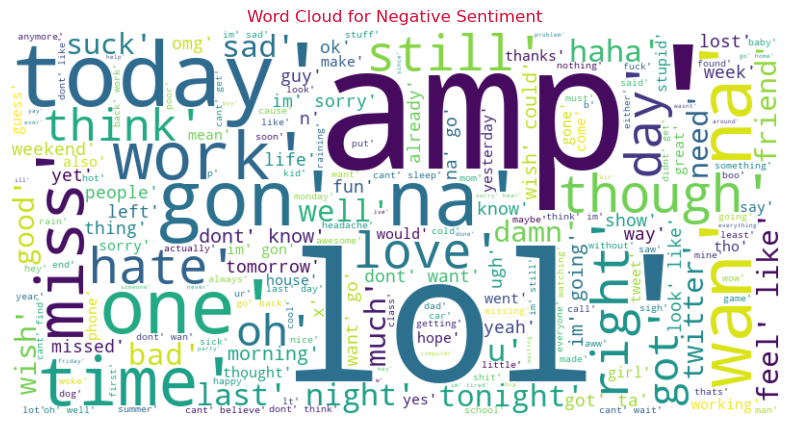

In [32]:
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_negative, interpolation='bilinear')
plt.title('Word Cloud for Negative Sentiment', color='crimson')
plt.axis('off')
plt.show()

##### Positive Sentiment

In [33]:
# Filter the data by the 'target' column to select sentiment label 4 (positive)

positive_df = df[df['target'] == 4]


# Get the corresponding text data for sentiment label 4

positive_text = ' '.join(positive_df['text'].astype(str))


# Create a word cloud for positive sentiment (4 - positive)

wordcloud_positive = WordCloud(width=800, height=400, background_color='white').generate(positive_text)

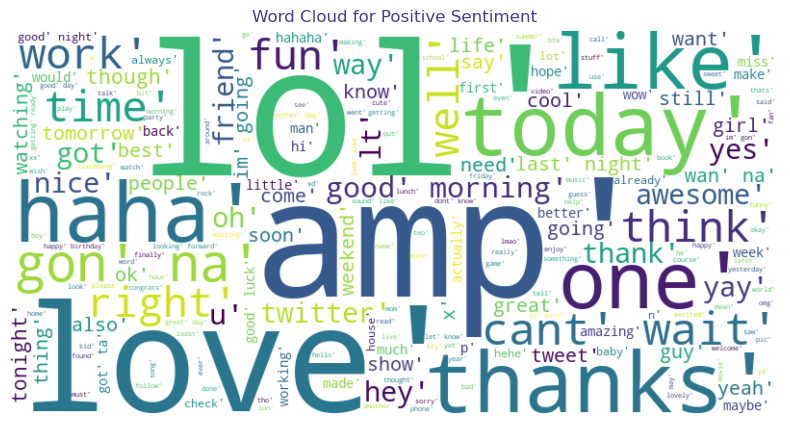

In [34]:
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_positive, interpolation='bilinear')
plt.title('Word Cloud for Positive Sentiment', color='darkslateblue')
plt.axis('off')
plt.show()

### Text Classification with Logistic Regression and Scaled TF-IDF Vectors

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [36]:
df['text'] = [str(text) for text in df['text']]

In [37]:
x = df['text']
y = df['target']

In [38]:
train_data, test_data, train_labels, test_labels = train_test_split(
    x, y, test_size=0.2, random_state=42
)

In [39]:
tfidf_vectorizer = TfidfVectorizer(max_features=6000, ngram_range=(1, 2))

train_tfidf_vectors = tfidf_vectorizer.fit_transform(train_data)

test_tfidf_vectors = tfidf_vectorizer.transform(test_data)


In [40]:
# Scale the TF-IDF vectors

scaler = StandardScaler(with_mean=False)

train_scale_vectors = scaler.fit_transform(train_tfidf_vectors)
test_scale_vectors = scaler.transform(test_tfidf_vectors)

In [41]:
classifier = LogisticRegression(max_iter=1000)
classifier.fit(train_tfidf_vectors, train_labels)



# Make predictions on the test data

predictions = classifier.predict(test_scale_vectors)

# Evaluate the model

accuracy = accuracy_score(test_labels, predictions)
report = classification_report(test_labels, predictions)
confusion = confusion_matrix(test_labels, predictions)

print("Accuracy:", accuracy)
print("Report\n", report)
print("Confusion Matrix")
print(confusion)

Accuracy: 0.74774375
Report
               precision    recall  f1-score   support

           0       0.72      0.81      0.76    159494
           4       0.79      0.68      0.73    160506

    accuracy                           0.75    320000
   macro avg       0.75      0.75      0.75    320000
weighted avg       0.75      0.75      0.75    320000

Confusion Matrix
[[129763  29731]
 [ 50991 109515]]


### Text Classification with MultinomialNB from naive_bayes

In [42]:
from sklearn.naive_bayes import MultinomialNB

# Train the Multinomial Naive Bayes classifier

classifier_multi = MultinomialNB()
classifier_multi.fit(train_tfidf_vectors, train_labels)

# Make predictions on the test data

predictions = classifier_multi.predict(test_tfidf_vectors)

# Evaluate the model

accuracy = accuracy_score(test_labels, predictions)
report = classification_report(test_labels, predictions)
confusion = confusion_matrix(test_labels, predictions)

print("Accuracy: ", accuracy)
print("Report: \n", report)
print("Confusion Matrix: \n", confusion)

Accuracy:  0.761325
Report: 
               precision    recall  f1-score   support

           0       0.76      0.77      0.76    159494
           4       0.77      0.76      0.76    160506

    accuracy                           0.76    320000
   macro avg       0.76      0.76      0.76    320000
weighted avg       0.76      0.76      0.76    320000

Confusion Matrix: 
 [[122370  37124]
 [ 39252 121254]]


### VotingClassifier - ensemble the Logistic Regression, Naive Bayes

In [44]:
from sklearn.ensemble import VotingClassifier

classifiers = [
    ('Logistic Regression', classifier),
    ('Naive Bayes', classifier_multi),  
]

In [45]:
# Create a VotingClassifier

ensemble_classifier = VotingClassifier(classifiers)

# Train the ensemble classifier

ensemble_classifier.fit(train_scale_vectors, train_labels)

# Make predictions on the test data

ensemble_predictions = ensemble_classifier.predict(test_scale_vectors)


In [46]:
# Evaluate the ensemble model

ensemble_accuracy = accuracy_score(test_labels, ensemble_predictions)
ensemble_report = classification_report(test_labels, ensemble_predictions)
ensemble_confusion = confusion_matrix(test_labels, ensemble_predictions)

In [47]:
print("Ensemble Accuracy: ", ensemble_accuracy)
print("Ensemble Report: \n", ensemble_report)
print("Ensemble Confusion Matrix: \n", ensemble_confusion)

Ensemble Accuracy:  0.762603125
Ensemble Report: 
               precision    recall  f1-score   support

           0       0.74      0.82      0.77    159494
           4       0.80      0.71      0.75    160506

    accuracy                           0.76    320000
   macro avg       0.77      0.76      0.76    320000
weighted avg       0.77      0.76      0.76    320000

Ensemble Confusion Matrix: 
 [[130384  29110]
 [ 46857 113649]]


### Confusion Matrix Visual for 3 Models

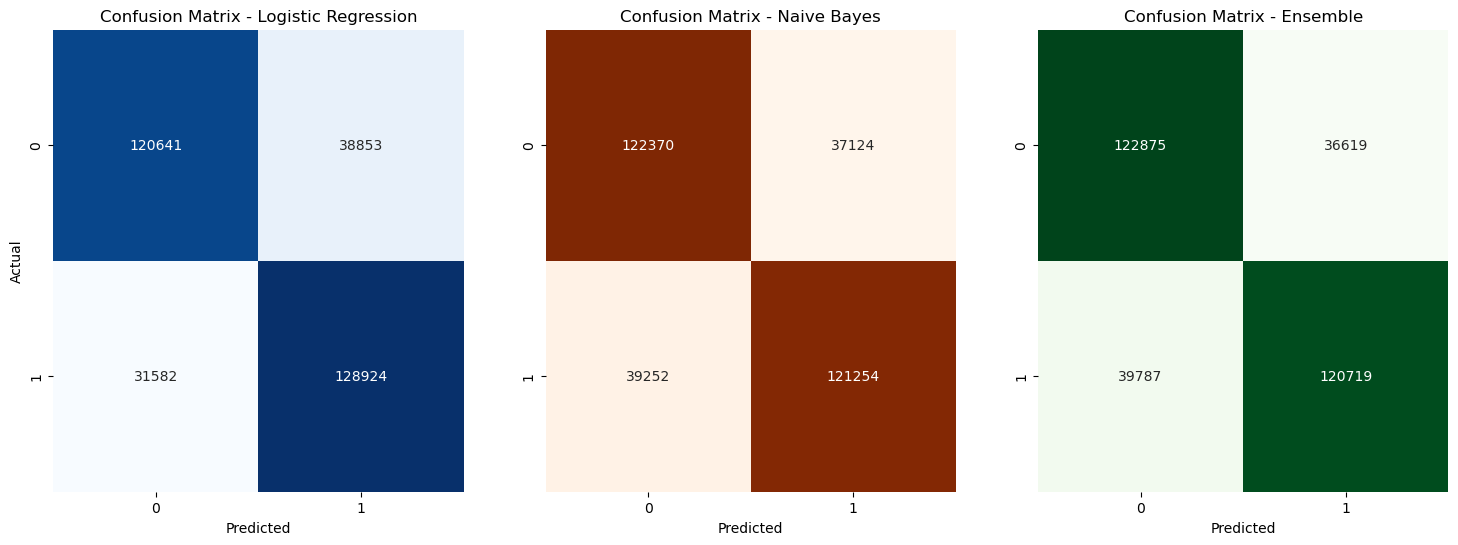

In [49]:
from sklearn.metrics import confusion_matrix

predict_lr = classifier.predict(test_tfidf_vectors)
predict_nb = classifier_multi.predict(test_tfidf_vectors)
predict_ensemble = ensemble_classifier.predict(test_tfidf_vectors)

predict_list = [predict_lr, predict_nb, predict_ensemble]

model_list = ["Logistic Regression", "Naive Bayes", "Ensemble"]

colors = ["Blues", "Oranges", "Greens"]

plt.figure(figsize=(18, 6))

for i in range(3):
    plt.subplot(1, 3, i + 1)
    cm = confusion_matrix(test_labels, predict_list[i])
    sns.heatmap(cm, annot=True, fmt="d", cmap=colors[i], cbar=False)
    plt.title(f"Confusion Matrix - {model_list[i]}")
    plt.xlabel('Predicted')
    if i == 0:
        plt.ylabel('Actual')

plt.show()

### Visual for all Precision and Recall

In [70]:
import matplotlib.pyplot as plt
import numpy as np

# Precision values

precision_0 = [0.72, 0.76, 0.74]  
precision_4 = [0.79, 0.77, 0.80]

# Recall values

recall_0 = [0.81, 0.77, 0.82]
recall_4 = [0.68, 0.76, 0.71]

# Model labels

models = ['Logistic Regression', 'Naive Bayes', 'Ensemble']

##### Precision

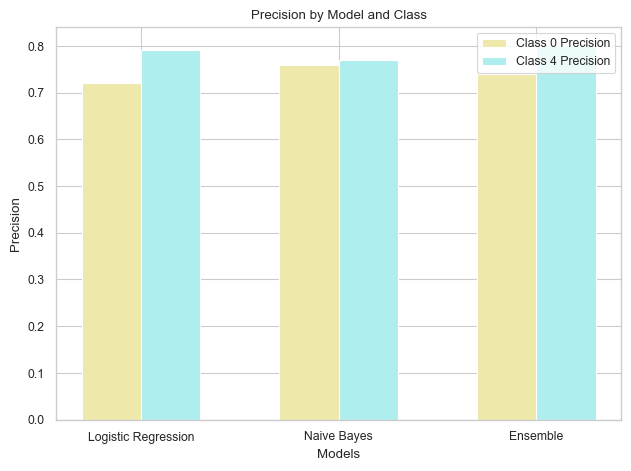

In [73]:

width = 0.3

x = np.arange(len(models))

fig, ax = plt.subplots()

# Plot precision values for class 0

ax.bar(x - width/2, precision_0, width, label='Class 0 Precision', align='center', color='palegoldenrod')

# Plot precision values for class 4

ax.bar(x + width/2, precision_4, width, label='Class 4 Precision', align='center', color='paleturquoise')


ax.set_xlabel('Models')
ax.set_ylabel('Precision')
ax.set_title('Precision by Model and Class')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()

plt.tight_layout()
plt.show()



##### Recall

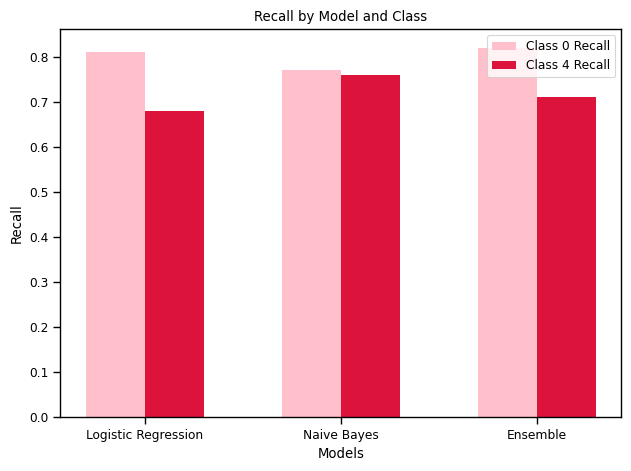

In [69]:
fig, ax = plt.subplots()

# Plot recall values for class 0

ax.bar(x - width/2, recall_0, width, label='Class 0 Recall', align='center', color='pink')


# Plot recall values for class 4

ax.bar(x + width/2, recall_4, width, label='Class 4 Recall', align='center', color='crimson')

ax.set_xlabel('Models')
ax.set_ylabel('Recall')
ax.set_title('Recall by Model and Class')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()

plt.tight_layout()
plt.show()

# Project Conclusion - Twitter Sentiment Analysis


## Introduction

The objective of this project was to perform sentiment analysis on tweets from the social networking website Twitter. 

The dataset consisted of 1,600,000 tweets obtained using the Twitter API. 

These tweets were labeled with sentiment values (0 = negative, 2 = neutral, 4 = positive). 

The dataset contained six fields, including target, tweet_id, date, flag, user_name, and text. 

The primary goal was to design a classification model capable of accurately predicting the polarity (sentiment) of tweets.


## Data Preprocessing

The project began with data preprocessing, which included the following steps:
- Data loading: The dataset was loaded using the `pandas` library, and the column names were appropriately set.

- Data exploration: Initial exploration of the dataset, including checking for missing values and displaying basic statistics, helped in understanding the data's structure and characteristics.

- Text preprocessing: Special characters, punctuation, numbers, and URLs were removed from the text data, and the text was converted to lowercase.

- Tokenization: Text was tokenized using the `nltk` library to break it into individual words.

- Stopword removal: Common English stopwords were removed from the tokenized text.

- Lemmatization: The remaining tokens were lemmatized to standardize the words.


## Data Analysis

- Sentiment Distribution: The distribution of sentiment labels (0 = negative, 4 = positive) was analyzed. The dataset exhibited a clear imbalance between negative and positive sentiments, with more tweets labeled as positive.

- Word Clouds: Word clouds were generated for both negative and positive sentiment labels. These visualizations revealed the most frequent words associated with each sentiment.


## Text Classification

Text classification was performed using three models: Logistic Regression, Naive Bayes, and an ensemble of the two. The following steps were taken for text classification:

### Logistic Regression
- A TF-IDF (Term Frequency-Inverse Document Frequency) vectorizer was used to convert the text data into numerical form.

- The TF-IDF vectors were scaled using `StandardScaler`.

- A Logistic Regression model was trained on the scaled TF-IDF vectors.

- Predictions were made on the test data and evaluated.

### Naive Bayes
- A Multinomial Naive Bayes classifier was trained on the TF-IDF vectors.

- Predictions were made on the test data and evaluated.


### Ensemble (Voting Classifier)
- An ensemble classifier was created by combining the predictions of the Logistic Regression and Naive Bayes models.

- The ensemble classifier was trained on the scaled TF-IDF vectors.

- Predictions were made and evaluated for the ensemble model.


## Model Evaluation

All three models were evaluated based on their accuracy, precision, recall, and the confusion matrix. The results are summarized as follows:

### Logistic Regression
- Accuracy: [0.74774375]
- Precision:
  - Class 0: [0.72]
  - Class 4: [0.79]
- Recall:
  - Class 0: [0.81]
  - Class 4: [0.68]

### Naive Bayes
- Accuracy: [0.761325]
- Precision:
  - Class 0: [0.76]
  - Class 4: [0.77]
- Recall:
  - Class 0: [0.77]
  - Class 4: [0.76]

### Ensemble (Voting Classifier)
- Accuracy: [0.762603125]
- Precision:
  - Class 0: [0.74]
  - Class 4: [0.80]
- Recall:
  - Class 0: [0.82]
  - Class 4: [0.71]

## Confusion Matrix Visualizations

Confusion matrices were visualized for each of the three models, highlighting the true positive, true negative, false positive, and false negative values. 

These visualizations provide insights into the performance of the models in terms of correctly classifying sentiments.


## Precision and Recall Visualizations

Visualizations of precision and recall were created to compare the performance of the three models with respect to class 0 (negative) and class 4 (positive) sentiments. 

Precision represents the proportion of true positive predictions among all positive predictions, while recall represents the proportion of true positive predictions among all actual positives.


## Conclusion

- This project successfully implemented sentiment analysis on Twitter data.

- It involved data preprocessing, text classification using multiple models, and thorough model evaluation.

- The ensemble model combining Logistic Regression and Naive Bayes achieved the highest accuracy.

- The model demonstrated balanced precision and recall for both negative and positive sentiments.

- This model can be effectively used for sentiment analysis tasks on Twitter data.

- Findings can be extended to applications like monitoring public sentiment, brand sentiment analysis, and recommendation systems.

- The project showcases the potential of natural language processing techniques in analyzing social media content.
